# Forward modelling
In this tutorial, we will see how to use pyR2 API to do forward modelling.

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
import sys
sys.path.append((os.path.relpath('../src'))) # add here the relative path of the API folder

import numpy as np # numpy for electrode generation
from api.R2 import R2


API path =  /media/jkl/data/phd/tmp/pyr2/src/api
pyR2 version =  1.0


In [2]:
k = R2() # create R2 object

Working directory is: /media/jkl/data/phd/tmp/pyr2/src/api/invdir
clearing the dirname


First we need to design some electrodes. We will use usefull numpy function for this.

In [3]:
elec = np.zeros((24,3))
elec[:,0] = np.arange(0, 24*0.5, 0.5) # with 0.5 m spacing and 24 electrodes
k.elec = elec
print(k.elec)

[[ 0.   0.   0. ]
 [ 0.5  0.   0. ]
 [ 1.   0.   0. ]
 [ 1.5  0.   0. ]
 [ 2.   0.   0. ]
 [ 2.5  0.   0. ]
 [ 3.   0.   0. ]
 [ 3.5  0.   0. ]
 [ 4.   0.   0. ]
 [ 4.5  0.   0. ]
 [ 5.   0.   0. ]
 [ 5.5  0.   0. ]
 [ 6.   0.   0. ]
 [ 6.5  0.   0. ]
 [ 7.   0.   0. ]
 [ 7.5  0.   0. ]
 [ 8.   0.   0. ]
 [ 8.5  0.   0. ]
 [ 9.   0.   0. ]
 [ 9.5  0.   0. ]
 [10.   0.   0. ]
 [10.5  0.   0. ]
 [11.   0.   0. ]
 [11.5  0.   0. ]]


Now let's create a mesh.

computed DOI : -7.67
Using a quadrilateral mesh
written mesh.dat file to 
/media/jkl/data/phd/tmp/pyr2/src/api/invdir/mesh.dat
Mesh plotted in 0.18329 seconds


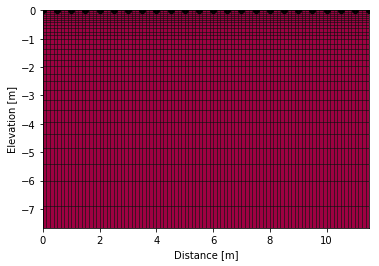

In [4]:
k.createMesh() # let's create the mesh based on these electrodes position
k.showMesh()

Based on this mesh, we can defined regions and assign them conductivities. There is an interactive way to do it when working outside of the jupyter notebook in interactive mode or GUI. Here we will see the pure API based way to do it using `R2.addRegion()`.

Help on method addRegion in module api.R2:

addRegion(xy, res0=100, phase0=1, blocky=False, fixed=False, ax=None) method of api.R2.R2 instance
    Add region according to a polyline defined by `xy` and assign it
    the starting resistivity `res0`.
    
    Parameters
    ----------
    xy : array
        Array with two columns for the x and y coordinates.
    res0 : float, optional
        Resistivity values of the defined area.
    phase0 : float, optional
        Read only if you choose the cR2 option. Phase value of the defined
        area in mrad
    blocky : bool, optional
        If `True` the boundary of the region will be blocky if inversion
        is block inversion.
    fixed : bool, optional
        If `True`, the inversion will keep the starting resistivity of this
        region.
    ax : matplotlib.axes.Axes
        If not `None`, the region will be plotted against this axes.

Mesh plotted in 0.26264 seconds
88 elements selected
88 elements selected


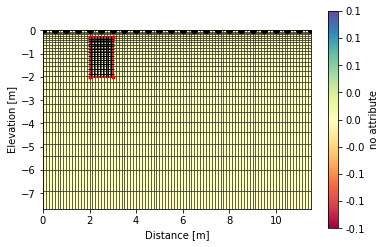

In [5]:
help(k.addRegion) # to display the help of the method
k.addRegion(np.array([[2,-0.3],[2,-2],[3,-2],[3,-0.3],[2,-0.3]]), 50)
# first specify the path of the region and then its resistivity value in Ohm.m

We then need to define the sequence that we will use. We can easily create a dipole-dipole sequence using `R2.createSequence()` or import one using `R2.importSequence()`.

In [6]:
help(k.createSequence) # don't hersitate to use the help to know more about each method

Help on method createSequence in module api.R2:

createSequence(skipDepths=[(0, 10)]) method of api.R2.R2 instance
    Create a dipole-dipole sequence.
    
    Parameters
    ----------
    skipDepths : list of tuple, optional
        Each tuple in the list is of the form `(skip, depths)`. The `skip` is the number of electrode between the A B and M N electrode. The `depths` is the number of quadrupole which will have the same current electrode (same A B). The higher this number, the deeper the investigation.



In [7]:
k.createSequence([(0,10),(1,9)]) # create a dipole-dipole of skip 0 with 10 levels and skip 1 with 9 levels
print(k.sequence) # the sequence is stored inside the R2 object

ddskip : 165 quadrupoles generated.
ddskip : 135 quadrupoles generated.
[[ 1  2  3  4]
 [ 1  2  4  5]
 [ 1  2  5  6]
 ...
 [18 20 21 23]
 [18 20 22 24]
 [19 21 22 24]]


Then comes the forward modelling part itself. The forward modelling will run R2, cR2, ... in forward mode inside a `fwd` directory inside the working directory. The resulting apparent resistivity are then embeded inside a `Survey` object and directly available for inversion for instance.

Writing .in file...
done

Writing protocol.dat ...
done

Running forward model


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v3.2 <<

 >> D a t e : 26 - 11 - 2018
 >> My beautiful survey
 >> F o r w a r d   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from resistivity.dat

 Measurements read:   300     Measurements rejected:     0

 >> Total Memory required is:          0.395 Gb
300/300 reciprocal measurements NOT found.
0 measurements error > 20 %
Forward modelling done.


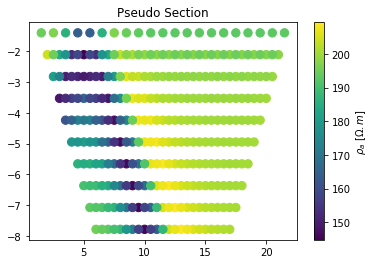

In [8]:
k.forward(noise=0.0) # the noise level can be specified here

We can already see that the pseudo-section already show clearly the import on the region we defined. We can now invert these apparent resistivities. Inverting the forward models allow the user to see if the parameters of the surveys (the sequence and electrode spacing) were optimium to resolve the target. If needed he can change them and do the whole process again.

Writing .in file and protocol.dat ...
Setting a homogeneous background model as the survey to                   be inverted is from a forward model already.
written mesh.dat file to 
/media/jkl/data/phd/tmp/pyr2/src/api/invdir/mesh.dat
done

-------- Main inversion ---------------



 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v3.2 <<

 >> D a t e : 26 - 11 - 2018
 >> My beautiful survey
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   w i l l   b e  m o d i f i e d <<


 Processing dataset   1


 Measurements read:   300     Measurements rejected:     0
   Geometric mean of apparent resistiviti

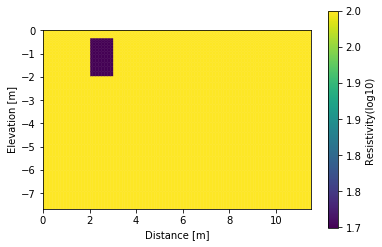

In [9]:
k.invert(iplot=True)

# In a nutshell

Working directory is: /media/jkl/data/phd/tmp/pyr2/src/api/invdir
clearing the dirname
computed DOI : -7.67
Using a quadrilateral mesh
written mesh.dat file to 
/media/jkl/data/phd/tmp/pyr2/src/api/invdir/mesh.dat
Mesh plotted in 0.21124 seconds
88 elements selected
88 elements selected
ddskip : 165 quadrupoles generated.
ddskip : 135 quadrupoles generated.
Writing .in file...
done

Writing protocol.dat ...
done

Running forward model


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v3.2 <<

 >> D a t e : 26 - 11 - 2018
 >> My beautiful survey
 >> F o r w a r d   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from resistivity.dat

 Measurements read:   300     Measurements rejected:     0

 >> Total Memory required is:          0.395 Gb
300/300 reciprocal measurements NOT found.
0 measurements error > 20 %
Forward modelling d

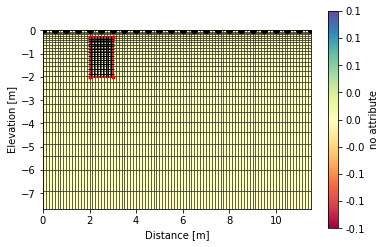

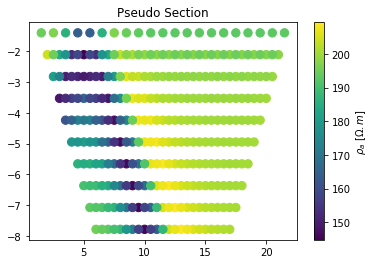

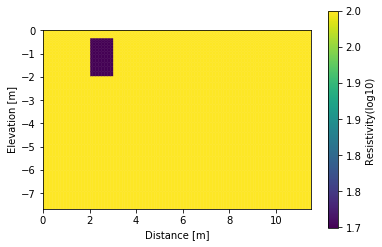

In [10]:
k = R2()

# defining electrode array
x = np.zeros((24, 3))
x[:,0] = np.arange(0, 24*0.5, 0.5)
k.elec = elec

# creating mesh
k.createMesh()

# add region
k.addRegion(np.array([[2,-0.3],[2,-2],[3,-2],[3,-0.3],[2,-0.3]]), 50)

# define sequence
k.createSequence([(0,10), (1,9)])

# forward modelling
k.forward(noise=0.0, iplot=True)

# inverse modelling based on forward results
k.resetRegions() # very important otherwise initial model shows solution
k.invert(iplot=True)
